# Author: Rajat Hatwar
# Title: Male Female voice recognition
# Date:11/25/2016
# Final Project

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("voiceMF.csv")

In [3]:
import multiprocessing
multiprocessing.cpu_count()

8

In [4]:
# Count of total data.
data.shape

(3168, 21)

In [5]:
# with help of this we can come to know names of columns.
data.columns

Index([u'meanfreq', u'sd', u'median', u'Q25', u'Q75', u'IQR', u'skew', u'kurt',
       u'sp.ent', u'sfm', u'mode', u'centroid', u'meanfun', u'minfun',
       u'maxfun', u'meandom', u'mindom', u'maxdom', u'dfrange', u'modindx',
       u'label'],
      dtype='object')

Here I had changed few column names.

In [6]:
data.columns=[u'meanfreq', u'sd', u'medn', u'Q25', u'Q75', u'IQR', u'skewness', u'kurtos',
       u'se', u'sfm', u'mode', u'centroid', u'meanfun', u'minfun',
       u'maxfun', u'meandom', u'mindom', u'maxdom', u'dfrange', u'modindx',
       u'label']

In [7]:
data

,meanfreq,sd,medn,Q25,Q75,IQR,skewness,kurtos,se,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [8]:
#Male Female counts.

data.label.value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [9]:
# Ratio of male and female
1584.00/3168.00

0.5

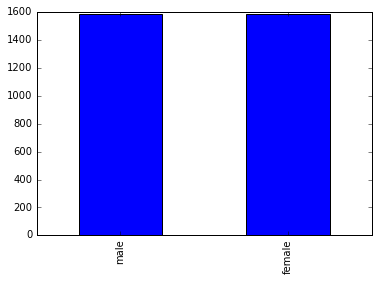

In [10]:
data.label.value_counts().plot(kind='bar')

### No of males are 50 % and No of female are 50%. 

In [11]:
data.meanfreq.value_counts()

0.212190    2
0.213732    2
0.193897    1
0.176947    1
0.129003    1
0.187114    1
0.129028    1
0.169332    1
0.161993    1
0.180186    1
0.167120    1
0.216295    1
0.163434    1
0.173250    1
0.165863    1
0.195260    1
0.202837    1
0.143916    1
0.191089    1
0.197073    1
0.240398    1
0.183985    1
0.177694    1
0.207772    1
0.203087    1
0.219964    1
0.163536    1
0.155076    1
0.082526    1
0.168424    1
           ..
0.134813    1
0.141798    1
0.236635    1
0.199104    1
0.075701    1
0.232455    1
0.188291    1
0.187154    1
0.176335    1
0.151477    1
0.208504    1
0.184245    1
0.197476    1
0.207567    1
0.198052    1
0.201185    1
0.194845    1
0.200690    1
0.163239    1
0.091436    1
0.168691    1
0.148974    1
0.141461    1
0.237417    1
0.138551    1
0.137556    1
0.157165    1
0.196554    1
0.176816    1
0.163643    1
Name: meanfreq, dtype: int64

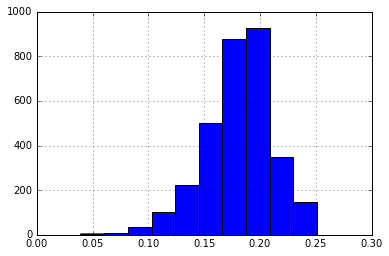

In [12]:
data.meanfreq.hist()

In [13]:
data[data.meanfreq.isnull()]

,meanfreq,sd,medn,Q25,Q75,IQR,skewness,kurtos,se,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label


In [14]:
data.sd.value_counts()

0.057705    2
0.043190    2
0.034771    1
0.059411    1
0.059244    1
0.085695    1
0.065328    1
0.047699    1
0.079557    1
0.038128    1
0.036174    1
0.057035    1
0.031530    1
0.060369    1
0.053048    1
0.067019    1
0.063390    1
0.050675    1
0.061399    1
0.036057    1
0.036022    1
0.060335    1
0.060701    1
0.059734    1
0.057842    1
0.034514    1
0.044968    1
0.068150    1
0.071637    1
0.068211    1
           ..
0.075790    1
0.042033    1
0.035930    1
0.079159    1
0.089584    1
0.059610    1
0.076832    1
0.055953    1
0.055280    1
0.039341    1
0.068246    1
0.033503    1
0.073201    1
0.053700    1
0.072290    1
0.034413    1
0.058098    1
0.066268    1
0.065616    1
0.035242    1
0.030562    1
0.029534    1
0.063773    1
0.057452    1
0.038734    1
0.063319    1
0.089755    1
0.040072    1
0.052843    1
0.060469    1
Name: sd, dtype: int64

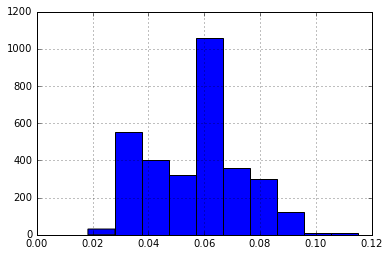

In [15]:
data.sd.hist()

In [16]:
data.Q25.value_counts()

0.140000    6
0.171613    3
0.203636    3
0.215833    2
0.120123    2
0.157396    2
0.222810    2
0.180657    2
0.136818    2
0.224564    2
0.176615    2
0.086383    2
0.166703    2
0.136585    2
0.191743    2
0.161345    2
0.128673    2
0.058159    2
0.184333    2
0.120499    2
0.137756    2
0.126415    2
0.147896    2
0.148089    2
0.141701    2
0.090817    2
0.136111    2
0.134566    2
0.155764    2
0.174054    2
           ..
0.066111    1
0.127706    1
0.159399    1
0.134321    1
0.150212    1
0.212229    1
0.167651    1
0.127619    1
0.101665    1
0.135882    1
0.190880    1
0.051895    1
0.216923    1
0.196882    1
0.096758    1
0.029201    1
0.152603    1
0.183414    1
0.133767    1
0.123934    1
0.136463    1
0.151034    1
0.179933    1
0.055695    1
0.166567    1
0.176101    1
0.156722    1
0.129612    1
0.128553    1
0.105651    1
Name: Q25, dtype: int64

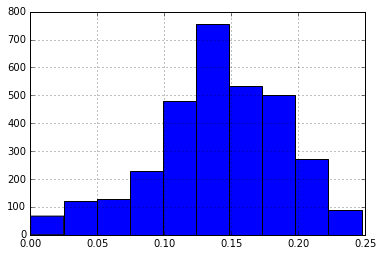

In [17]:
data.Q25.hist()

In [18]:

data.Q75.value_counts()

0.240000    5
0.241818    5
0.245000    4
0.229091    4
0.233333    4
0.241379    4
0.248889    4
0.240408    3
0.254925    3
0.224000    3
0.247781    3
0.204731    3
0.208571    3
0.257518    2
0.207438    2
0.216134    2
0.254003    2
0.247877    2
0.237308    2
0.244255    2
0.196596    2
0.252000    2
0.258077    2
0.235362    2
0.219479    2
0.229744    2
0.224412    2
0.230203    2
0.222222    2
0.214062    2
           ..
0.178430    1
0.223884    1
0.208536    1
0.200944    1
0.250872    1
0.263500    1
0.226082    1
0.236889    1
0.220061    1
0.239518    1
0.237103    1
0.228905    1
0.224643    1
0.206531    1
0.243562    1
0.215506    1
0.250620    1
0.235031    1
0.203264    1
0.245783    1
0.195789    1
0.238549    1
0.228862    1
0.182380    1
0.230832    1
0.237344    1
0.247299    1
0.200338    1
0.256449    1
0.250000    1
Name: Q75, dtype: int64

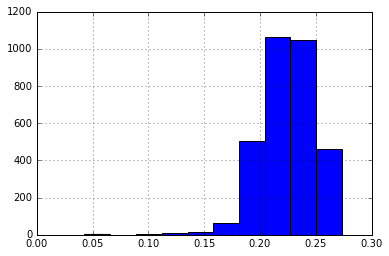

In [19]:
data.Q75.hist()

In [20]:
data.IQR.value_counts()


0.035000    4
0.043077    4
0.105000    4
0.046667    3
0.024889    3
0.023333    3
0.105845    3
0.032153    2
0.114521    2
0.105128    2
0.030427    2
0.115979    2
0.030000    2
0.151859    2
0.024738    2
0.110758    2
0.114506    2
0.113505    2
0.078596    2
0.108182    2
0.101379    2
0.053816    2
0.044333    2
0.076194    2
0.121730    2
0.029697    2
0.103158    2
0.126082    2
0.098034    2
0.052157    2
           ..
0.025890    1
0.074841    1
0.115886    1
0.046425    1
0.062990    1
0.113497    1
0.101880    1
0.042859    1
0.066209    1
0.064891    1
0.039443    1
0.121072    1
0.030654    1
0.114800    1
0.115922    1
0.075645    1
0.032337    1
0.109505    1
0.053514    1
0.048862    1
0.108657    1
0.019564    1
0.121208    1
0.117972    1
0.050313    1
0.118169    1
0.085155    1
0.118163    1
0.053935    1
0.051646    1
Name: IQR, dtype: int64

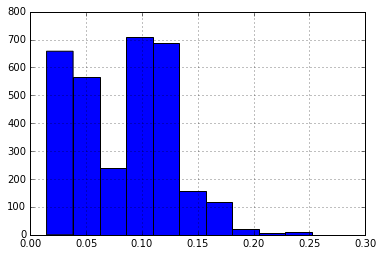

In [21]:
data.IQR.hist()

In [22]:
data.columns


Index([u'meanfreq', u'sd', u'medn', u'Q25', u'Q75', u'IQR', u'skewness',
       u'kurtos', u'se', u'sfm', u'mode', u'centroid', u'meanfun', u'minfun',
       u'maxfun', u'meandom', u'mindom', u'maxdom', u'dfrange', u'modindx',
       u'label'],
      dtype='object')

In [23]:
data.skewness.value_counts()


1.862573     2
2.113598     2
1.328383     1
2.391135     1
1.994092     1
1.110100     1
2.132116     1
1.982229     1
2.208944     1
1.837986     1
1.542249     1
0.942655     1
2.472002     1
27.722046    1
2.360305     1
1.866182     1
3.050910     1
2.771377     1
1.909811     1
3.271182     1
2.446713     1
1.465933     1
2.082121     1
2.174261     1
3.572509     1
2.451859     1
2.326818     1
1.266136     1
3.439047     1
1.418872     1
            ..
1.924342     1
2.725312     1
2.359162     1
2.316270     1
2.098578     1
1.413535     1
1.003340     1
1.519940     1
1.971271     1
3.577312     1
2.535269     1
3.587650     1
1.574085     1
0.937421     1
1.458799     1
2.232983     1
3.736487     1
1.687028     1
1.215849     1
1.351214     1
1.336086     1
1.971270     1
0.994005     1
1.163423     1
1.900356     1
2.913354     1
1.282387     1
2.641074     1
1.050421     1
24.173676    1
Name: skewness, dtype: int64

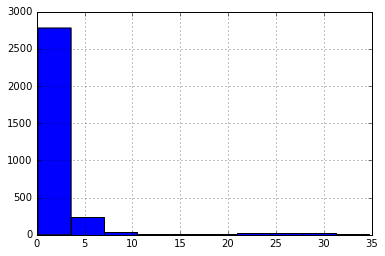

In [24]:
data.skewness.hist()

In [25]:
data.kurtos.value_counts()

6.109790      2
7.890927      2
3.390100      1
3.587348      1
8.204138      1
7.061099      1
3.701668      1
51.399879     1
8.617342      1
10.807668     1
4.073729      1
6.512019      1
4.116322      1
11.415243     1
5.104350      1
7.699586      1
8.115678      1
2.876094      1
6.508522      1
34.501778     1
416.183638    1
4.349309      1
6.286534      1
4.321013      1
15.148047     1
15.178800     1
5.145753      1
3.945741      1
4.261363      1
4.670177      1
             ..
12.061900     1
7.132243      1
9.538397      1
5.634614      1
9.653731      1
459.517292    1
6.484113      1
8.190791      1
20.799925     1
13.447410     1
4.121198      1
5.130779      1
7.980531      1
16.647528     1
5.388298      1
3.553941      1
73.829765     1
18.349378     1
13.663951     1
8.969220      1
11.452071     1
6.961662      1
8.853934      1
897.422258    1
5.127113      1
8.114596      1
6.870351      1
10.201247     1
20.073980     1
13.211780     1
Name: kurtos, dtype: int

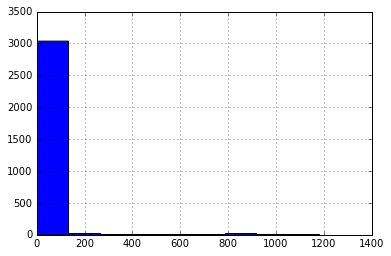

In [26]:
data.kurtos.hist()

In [27]:
data.se.value_counts()

0.859712    2
0.877669    2
0.829810    1
0.918321    1
0.966393    1
0.859690    1
0.850602    1
0.871437    1
0.966599    1
0.959855    1
0.924981    1
0.890396    1
0.958561    1
0.821235    1
0.908975    1
0.875382    1
0.960716    1
0.902057    1
0.948383    1
0.966312    1
0.861033    1
0.906056    1
0.901610    1
0.963294    1
0.938698    1
0.826639    1
0.912982    1
0.915852    1
0.964292    1
0.971955    1
           ..
0.946290    1
0.817357    1
0.941625    1
0.925328    1
0.824379    1
0.859377    1
0.940100    1
0.846554    1
0.818328    1
0.879829    1
0.824685    1
0.922947    1
0.928564    1
0.824595    1
0.892011    1
0.863628    1
0.942743    1
0.915577    1
0.940106    1
0.850399    1
0.944845    1
0.904403    1
0.839869    1
0.927355    1
0.966915    1
0.835164    1
0.935248    1
0.934765    1
0.793975    1
0.822504    1
Name: se, dtype: int64

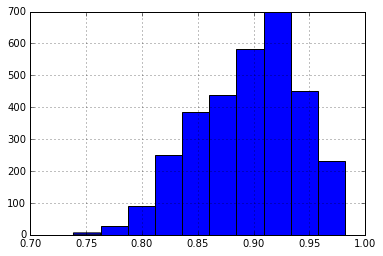

In [28]:
data.se.hist()

In [29]:
data.sfm.value_counts()


0.314398    2
0.084934    2
0.386429    1
0.082204    1
0.537051    1
0.291601    1
0.411248    1
0.430192    1
0.140361    1
0.696907    1
0.504383    1
0.339382    1
0.170659    1
0.235183    1
0.807552    1
0.222245    1
0.202870    1
0.659248    1
0.364435    1
0.333411    1
0.499229    1
0.302646    1
0.584654    1
0.539770    1
0.309004    1
0.589737    1
0.312363    1
0.246323    1
0.469940    1
0.778149    1
           ..
0.421471    1
0.264273    1
0.159883    1
0.729505    1
0.249856    1
0.528054    1
0.159506    1
0.468708    1
0.303458    1
0.644403    1
0.346787    1
0.280106    1
0.148897    1
0.322392    1
0.465292    1
0.248625    1
0.176066    1
0.289835    1
0.488918    1
0.190324    1
0.391551    1
0.406653    1
0.321683    1
0.718462    1
0.266461    1
0.268711    1
0.231488    1
0.348963    1
0.522444    1
0.317350    1
Name: sfm, dtype: int64

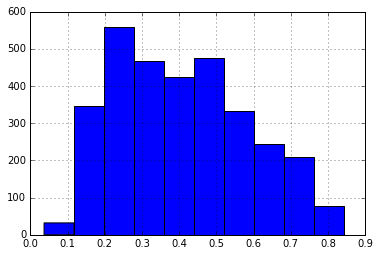

In [30]:
data.sfm.hist()

In [31]:
data.centroid.value_counts()


0.212190    2
0.213732    2
0.193897    1
0.176947    1
0.129003    1
0.187114    1
0.129028    1
0.169332    1
0.161993    1
0.180186    1
0.167120    1
0.216295    1
0.163434    1
0.173250    1
0.165863    1
0.195260    1
0.202837    1
0.143916    1
0.191089    1
0.197073    1
0.240398    1
0.183985    1
0.177694    1
0.207772    1
0.203087    1
0.219964    1
0.163536    1
0.155076    1
0.082526    1
0.168424    1
           ..
0.134813    1
0.141798    1
0.236635    1
0.199104    1
0.075701    1
0.232455    1
0.188291    1
0.187154    1
0.176335    1
0.151477    1
0.208504    1
0.184245    1
0.197476    1
0.207567    1
0.198052    1
0.201185    1
0.194845    1
0.200690    1
0.163239    1
0.091436    1
0.168691    1
0.148974    1
0.141461    1
0.237417    1
0.138551    1
0.137556    1
0.157165    1
0.196554    1
0.176816    1
0.163643    1
Name: centroid, dtype: int64

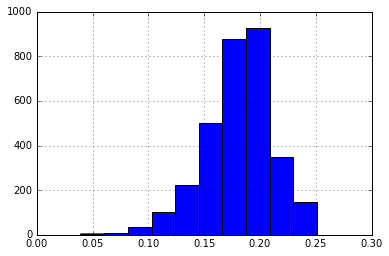

In [32]:
data.centroid.hist()

In [33]:
data.meanfun.value_counts()


0.139942    2
0.133667    2
0.081505    1
0.182781    1
0.204786    1
0.104187    1
0.121896    1
0.153339    1
0.171083    1
0.166934    1
0.107577    1
0.156422    1
0.130035    1
0.146746    1
0.175148    1
0.115817    1
0.165075    1
0.132835    1
0.180638    1
0.128077    1
0.144159    1
0.162557    1
0.107315    1
0.153493    1
0.152013    1
0.185199    1
0.136302    1
0.214127    1
0.123088    1
0.163142    1
           ..
0.108234    1
0.098069    1
0.166000    1
0.109408    1
0.104033    1
0.089792    1
0.149574    1
0.111340    1
0.132458    1
0.165601    1
0.084462    1
0.109356    1
0.116251    1
0.156465    1
0.136617    1
0.137394    1
0.186651    1
0.148348    1
0.137973    1
0.153974    1
0.172738    1
0.182589    1
0.148914    1
0.197426    1
0.099888    1
0.163482    1
0.160137    1
0.174386    1
0.115067    1
0.194529    1
Name: meanfun, dtype: int64

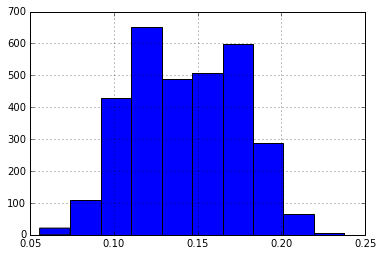

In [34]:
data.meanfun.hist()

In [35]:
data.minfun.value_counts()


0.046921    64
0.047105    59
0.047013    53
0.046967    47
0.047059    46
0.047291    46
0.047151    41
0.047198    40
0.047384    40
0.047478    35
0.047431    32
0.047666    31
0.047572    31
0.047761    28
0.047856    27
0.047244    27
0.047337    26
0.047525    26
0.047714    24
0.048000    24
0.047904    24
0.047809    23
0.048048    22
0.047619    21
0.048193    19
0.048096    17
0.019531    17
0.048387    16
0.016667    16
0.048485    15
            ..
0.031546     1
0.035398     1
0.019608     1
0.076190     1
0.055491     1
0.043577     1
0.009785     1
0.027322     1
0.025765     1
0.021505     1
0.020177     1
0.027634     1
0.039370     1
0.039604     1
0.027119     1
0.043707     1
0.019002     1
0.054237     1
0.043320     1
0.034557     1
0.044693     1
0.023290     1
0.051337     1
0.025600     1
0.097087     1
0.086486     1
0.011364     1
0.073394     1
0.035165     1
0.072727     1
Name: minfun, dtype: int64

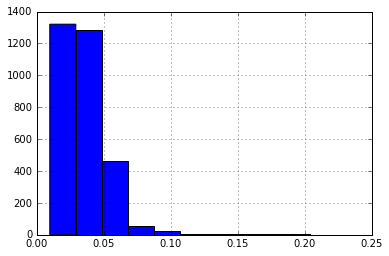

In [36]:
data.minfun.hist()

In [37]:
data.maxfun.value_counts()


0.279070    532
0.275862    462
0.277457    339
0.271186    235
0.266667    159
0.262295    127
0.274286    107
0.250000    101
0.258065     86
0.253968     62
0.272727     58
0.246154     49
0.231884     44
0.238806     42
0.242424     42
0.277778     39
0.222222     36
0.228571     35
0.235294     30
0.269663     30
0.270270     29
0.268156     29
0.256410     26
0.219178     23
0.225352     21
0.213333     18
0.263158     16
0.205128     16
0.265193     16
0.216216     16
           ... 
0.103093      1
0.158730      1
0.241206      1
0.128000      1
0.108696      1
0.112360      1
0.244898      1
0.125000      1
0.156250      1
0.259459      1
0.170213      1
0.172414      1
0.126582      1
0.129870      1
0.169492      1
0.163265      1
0.149533      1
0.130081      1
0.105263      1
0.151515      1
0.131148      1
0.149254      1
0.139130      1
0.136752      1
0.275625      1
0.158416      1
0.161290      1
0.128205      1
0.188235      1
0.140351      1
Name: maxfun, dtype: int

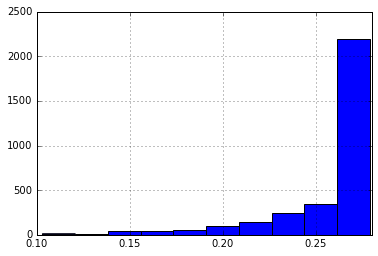

In [38]:
data.maxfun.hist()

In [39]:
data.meandom.value_counts()


0.007812    61
0.195312     4
0.070312     4
0.718750     4
0.460938     4
0.687500     3
1.372396     3
0.367839     3
1.007812     3
0.578125     3
0.257812     3
0.810547     2
0.313895     2
0.818125     2
0.935462     2
0.454102     2
0.472147     2
0.680707     2
1.005632     2
0.756696     2
1.113281     2
0.891493     2
0.715693     2
0.689732     2
1.119141     2
1.080469     2
0.734965     2
1.278363     2
0.988281     2
1.054688     2
            ..
0.594531     1
1.931350     1
0.298077     1
1.592045     1
1.689732     1
1.394231     1
1.178571     1
0.071915     1
0.971495     1
1.016016     1
1.271034     1
0.756250     1
1.189844     1
0.797917     1
2.176082     1
1.081108     1
0.587946     1
1.352742     1
0.436663     1
0.121505     1
0.407738     1
0.519064     1
2.254488     1
0.313657     1
1.503989     1
1.068934     1
0.448468     1
1.966539     1
0.562411     1
2.403783     1
Name: meandom, dtype: int64

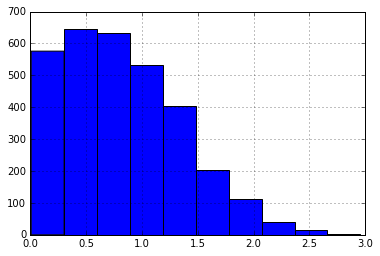

In [40]:
data.meandom.hist()

In [41]:
data.mindom.value_counts()


0.023438    1246
0.007812     814
0.164062     109
0.054688      63
0.004883      61
0.093750      46
0.156250      46
0.210938      45
0.070312      42
0.015625      38
0.140625      36
0.187500      35
0.031250      34
0.171875      33
0.234375      29
0.046875      26
0.101562      23
0.097656      23
0.148438      21
0.092773      21
0.166016      20
0.179688      20
0.078125      20
0.039062      20
0.117188      19
0.125000      18
0.087891      17
0.085938      16
0.195312      16
0.109375      14
            ... 
0.146484       4
0.073242       4
0.185547       4
0.203125       4
0.112305       3
0.214844       3
0.068359       3
0.048828       3
0.136719       3
0.141602       3
0.053711       3
0.014648       2
0.029297       2
0.043945       2
0.063477       2
0.219727       1
0.190430       1
0.180664       1
0.400391       1
0.107666       1
0.249023       1
0.151367       1
0.449219       1
0.175781       1
0.343750       1
0.351562       1
0.027344       1
0.458984      

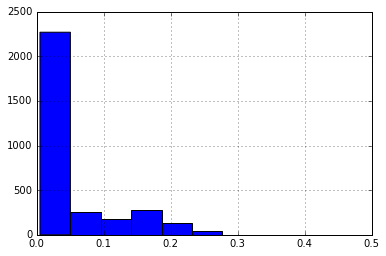

In [42]:
data.mindom.hist()

In [43]:
data.maxdom.value_counts()

0.007812     61
7.000000     21
5.156250     16
12.023438    15
0.562500     13
0.695312     13
0.786133     13
0.734375     11
5.390625     11
5.273438     11
6.445312     11
8.109375     10
8.906250     10
0.795898     10
0.781250     10
6.140625     10
9.070312     10
0.242188      9
0.664062      9
0.234375      9
10.078125     9
8.015625      9
0.800781      9
0.742188      9
4.382812      9
5.953125      9
0.656250      9
0.640625      9
0.710938      9
7.734375      9
             ..
0.761719      1
4.117188      1
4.710938      1
2.320312      1
5.398438      1
2.226562      1
5.679688      1
7.945312      1
0.751953      1
10.687500     1
2.749023      1
3.803711      1
3.417969      1
10.054688     1
2.039062      1
3.664062      1
0.942383      1
1.040039      1
0.927734      1
1.088867      1
7.054688      1
3.754883      1
2.187500      1
4.140625      1
6.507812      1
4.054688      1
16.664062     1
3.546875      1
21.562500     1
8.871680      1
Name: maxdom, dtype: int

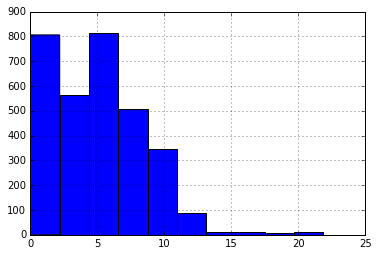

In [44]:
data.maxdom.hist()

In [45]:
data.dfrange.value_counts()


0.000000     65
5.132812     15
0.625000     15
0.679688     14
3.750000     13
0.664062     12
8.882812     11
0.703125     11
0.640625     11
5.156250     10
12.000000    10
6.000000     10
9.046875     10
8.695312      9
8.085938      9
5.250000      9
4.476562      9
7.992188      9
6.070312      9
8.132812      9
5.085938      9
6.992188      9
0.687500      9
0.632812      9
0.257812      8
6.398438      8
0.554688      8
6.539062      8
8.531250      8
9.117188      8
             ..
17.484375     1
14.554688     1
5.328125      1
2.531250      1
20.460938     1
10.359375     1
10.757812     1
0.732422      1
1.828125      1
3.000000      1
1.035156      1
10.570312     1
18.937500     1
18.093750     1
21.820312     1
15.773438     1
11.132812     1
3.187500      1
3.676758      1
10.781250     1
11.765625     1
1.640625      1
3.046875      1
2.085938      1
3.779297      1
15.679688     1
11.882812     1
2.132812      1
1.687500      1
8.764014      1
Name: dfrange, dtype: in

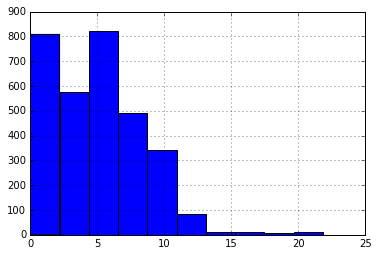

In [46]:
data.dfrange.hist()

In [47]:
data.modindx.value_counts()

0.000000    65
0.133333     3
0.166667     3
0.117647     3
0.200000     3
0.052632     3
0.060440     2
0.106494     2
0.229051     2
0.240741     2
0.192308     2
0.121344     2
0.172249     2
0.136842     2
0.146205     2
0.062500     2
0.238095     2
0.107527     2
0.211538     2
0.050000     2
0.140000     2
0.339394     1
0.123582     1
0.333333     1
0.207017     1
0.096163     1
0.097214     1
0.098975     1
0.087424     1
0.129799     1
            ..
0.193145     1
0.120914     1
0.076038     1
0.132736     1
0.088500     1
0.250709     1
0.468900     1
0.420000     1
0.174470     1
0.310897     1
0.122801     1
0.263953     1
0.310714     1
0.047015     1
0.088251     1
0.291667     1
0.117834     1
0.057484     1
0.090346     1
0.162885     1
0.159815     1
0.145329     1
0.145129     1
0.210699     1
0.330808     1
0.135866     1
0.134397     1
0.174430     1
0.042301     1
0.543190     1
Name: modindx, dtype: int64

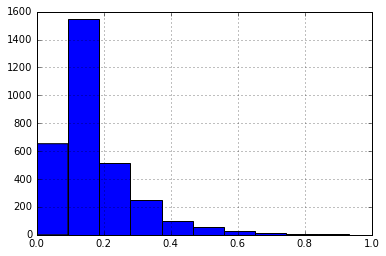

In [48]:
data.modindx.hist()

In [49]:
data[data.modindx.isnull()]

,meanfreq,sd,medn,Q25,Q75,IQR,skewness,kurtos,se,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label


## To check missing values

In [50]:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print "Missing values per column:"
print data.apply(num_missing, axis=0) #axis=0 defines that function is to be applied on each column



Missing values per column:
meanfreq    0
sd          0
medn        0
Q25         0
Q75         0
IQR         0
skewness    0
kurtos      0
se          0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


##  There is not any missing values in any columns .
## I had plot all the histogram.
# EDA completed on the dataset

## To describe categorial variables 

In [51]:
def describe_categorical(data):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(data[data.columns[data.dtypes == "object"]].describe().to_html()))

In [52]:
describe_categorical(data)

,label
count,3168
unique,2
top,male
freq,1584


In [53]:
data.describe()

,meanfreq,sd,medn,Q25,Q75,IQR,skewness,kurtos,se,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


## Numeric Variables

In [54]:
numeric_variables = list(data.dtypes[data.dtypes != "object"].index)
data[numeric_variables].head()

,meanfreq,sd,medn,Q25,Q75,IQR,skewness,kurtos,se,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [55]:
print("Total number of samples: {}".format(data.shape[0]))
print("Number of male: {}".format(data[data.label == 'male'].shape[0]))
print("Number of female: {}".format(data[data.label == 'female'].shape[0]))

Total number of samples: 3168
Number of male: 1584
Number of female: 1584


## It is total no of samples and number of male and female count.

In [54]:
data.isnull().sum()

meanfreq    0
sd          0
medn        0
Q25         0
Q75         0
IQR         0
skewness    0
kurtos      0
se          0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

##  Pearson's Correlation Coefficient


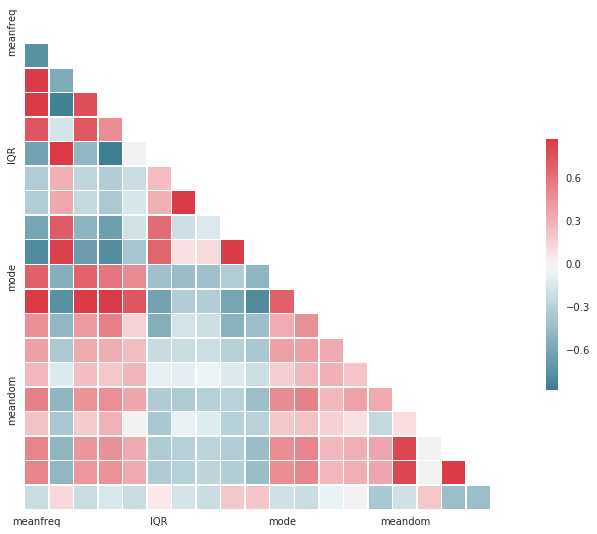

In [55]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## seaborn 

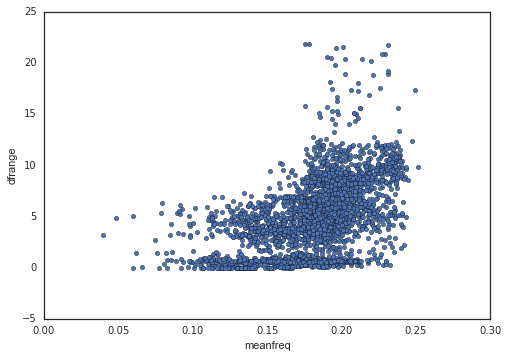

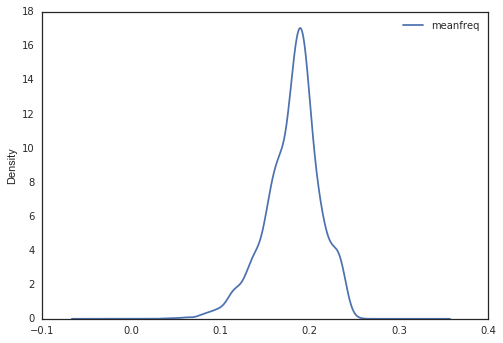

In [56]:
import warnings
warnings.filterwarnings("ignore")
import seaborn
data.head()
data.plot(kind='scatter', x='meanfreq', y='dfrange')
data.plot(kind='kde', y='meanfreq')


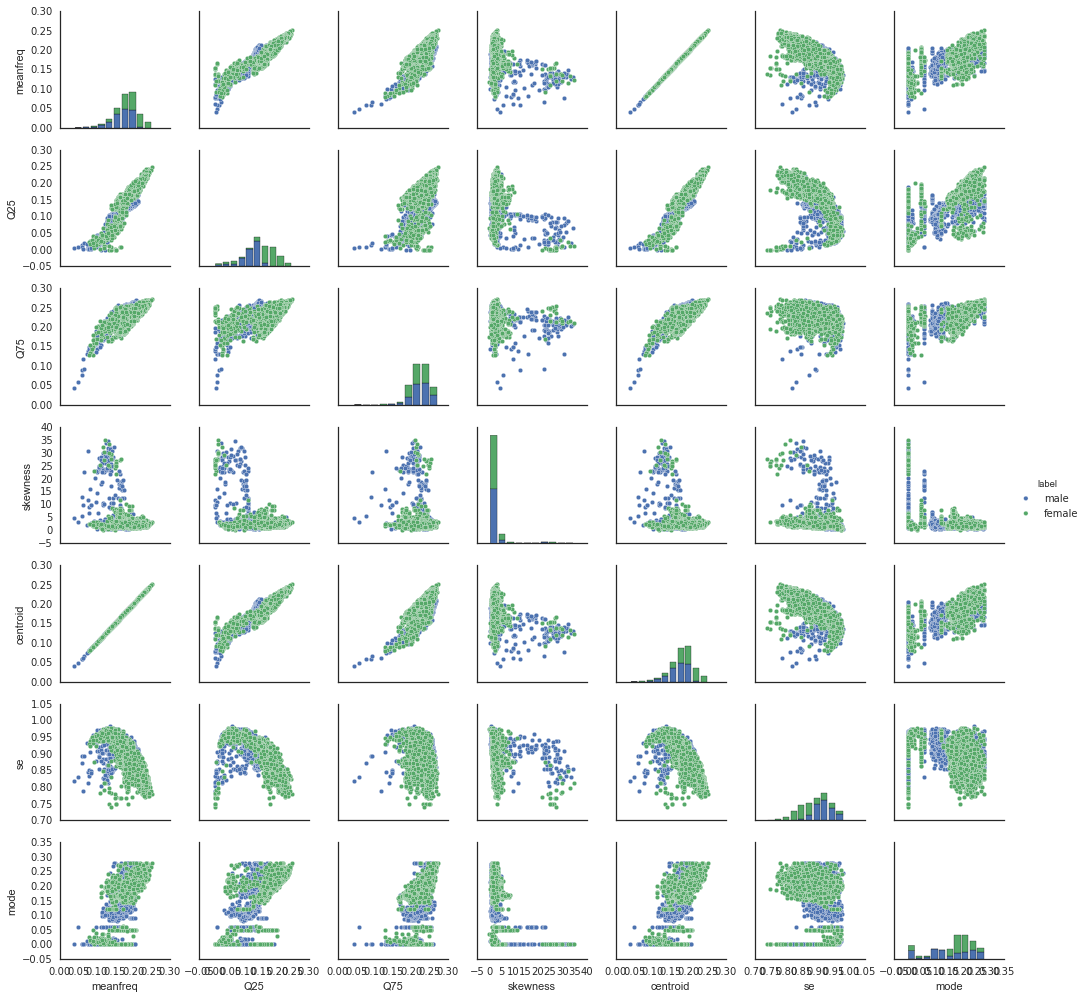

In [57]:
seaborn.pairplot(data[['meanfreq', 'Q25', 'Q75', 'skewness', 'centroid','se','mode','label']], 
                 hue='label', size=2)

In [58]:
# assuming label as prediction.
y = data.pop("label")

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

In [60]:
# we had droped few columns .
data.drop(["se","mode"],axis=1, inplace=True)

In [61]:
data

,meanfreq,sd,medn,Q25,Q75,IQR,skewness,kurtos,sfm,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.491918,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.513724,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.478905,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.727232,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.783568,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.738307,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.762638,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.719858,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.770992,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.804505,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920


# Grid Search



In [62]:
### Grid Search
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)


In [63]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [64]:
ms = estimator.fit(X_train, y_train)

In [65]:
print(ms.best_score_)
print(ms.best_params_)

0.97908445146
{'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 400}


In [66]:
# Best Estimator
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
best_rfc = estimator.best_estimator_

In [68]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.982649842271


## Accuracy is 0.982649842271

In [69]:
y_hat = best_rfc.predict(X_test)

In [70]:
y_hat

array(['female', 'male', 'male', 'female', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'male', 'female',
       'female', 'male', 'female', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'male', 'male',
       'female', 'male', 'female', 'female', 'female', 'male', 'female',
       'male', 'male', 'female', 'male', 'female', 'male', 'female',
       'male', 'female', 'female', 'male', 'female', 'male', 'female',
       'female', 'female', 'male', 'male', 'female', 'male', 'male',
       'female', 'female', 'female', 'male', 'male', 'male', 'male',
       'male', 'female', 'male', 'female', 'male', 'female', 'female',
       'female', 'female', 'female', 'male', 'male', 'male', 'female',
       '

In [71]:
y_test

2148    female
1124      male
170       male
3158    female
2229    female
1960    female
411       male
457       male
2881    female
602       male
2339    female
2490    female
2315    female
2985    female
2906    female
2421    female
2260    female
2877    female
2550    female
621       male
2209    female
2211    female
978       male
2937    female
1011      male
2089    female
1006      male
194       male
1018      male
178       male
         ...  
1385      male
2299    female
2453    female
2898    female
366       male
2034    female
29        male
2645    female
22        male
1179      male
999       male
1047      male
420       male
1559      male
460       male
43        male
87        male
1102      male
1950    female
1777    female
561       male
282       male
2494    female
1357      male
1309      male
3007    female
912       male
533       male
857       male
2594    female
Name: label, dtype: object

In [72]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print correct / float(total)

0.982649842271


In [73]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

     female       0.97      0.99      0.98       297
       male       0.99      0.97      0.98       337

avg / total       0.98      0.98      0.98       634



### Confusion matrix

In [74]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[295   2]
 [  9 328]]


Precision: 329 / 329 + 3 = .99

Recall: 329 / 329 + 8 = .97


# Cross Validation

In [75]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)

In [76]:
scores

array([ 0.93396226,  0.94968553,  0.98427673,  0.95597484,  0.96835443,
        0.99367089,  0.99367089,  0.98734177,  0.92088608,  0.99367089])

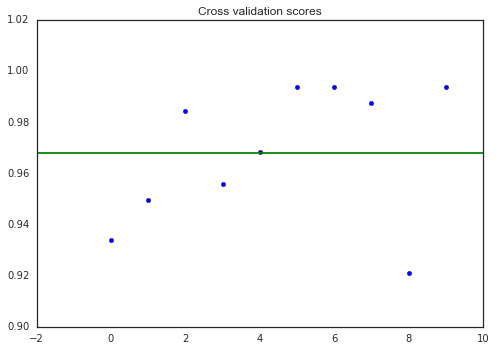

In [77]:
import matplotlib.pyplot as plt
plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g') # Mean value of cross validation scores
plt.show()

In [78]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '97 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.968149 +/-  0.018201
97 percent probability that if this experiment were repeated over and over the average score would be between 0.949949 and 0.986350


## Accuracy of K-Fold Cross Validation is 0.968149. From this we can infer that out predication varies in between 0.949949 and 0.986350.


# From grid search accuracy is 0.982649842271